# Oxford-IIIT Pet Breed Classification with PyTorch

Welcome to this deep learning project where we'll build a **pet breed classifier** using the **Oxford-IIIT Pet Dataset** and **PyTorch**. This project is designed to demonstrate the practical application of computer vision techniques on a real-world dataset — classifying pet images into 37 different breeds.

---

## What You'll Learn

In this notebook, we will:

- **Load and explore** the Oxford-IIIT Pet dataset
- **Preprocess and augment** image data using `torchvision.transforms`
- **Build image classification models**:
  - A custom CNN from scratch
  - A fine-tuned pretrained model (ResNet18)
- **Track training performance** using **TensorBoard**
- **Evaluate** model performance using accuracy and a confusion matrix
- **Save and load models** for inference
- **Make predictions** and visualize results

---

## Why This Project Matters

- The Oxford-IIIT Pet dataset is small, realistic, and highly relatable.
- Classifying between 37 breeds makes this a **multi-class image classification problem**.
- This is a great project that demonstrates:
  - Model building and evaluation
  - Use of pretrained networks
  - Experiment tracking with TensorBoard
  - Application of PyTorch skills to real-world data

---

Let’s get started! 🚀


In [15]:
# Import PyTorch
import torch
from torch import nn 

# Import torchvision
import torchvision
from torchvision import datasets 
from torchvision import transforms 
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt 

# Check versions
print(torch.__version__)
print(torchvision.__version__)

2.5.1
0.20.1


## 1. Getting a dataset

The dataset we'll be using `OxfordIIITPet` from torchvision.datasets

In [58]:
import torchvision.transforms as T
# Define the transformation pipeline
data_transform = T.Compose([
    # 1. Resize the smaller edge to 256
    T.Resize(256),
    
    # 2. Crop a 224x224 square from the center
    T.CenterCrop(224),
    
    # 3. Convert the image to a PyTorch tensor
    T.ToTensor(),
    
    # 4. Normalize the tensor (highly recommended)
    # These are the standard mean and std for models pretrained on ImageNet
    T.Normalize(mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225])
])

# Setup training data
train_data = datasets.OxfordIIITPet(
    root='data',
    split='trainval',
    target_types='category',
    transform=data_transform,
    download=True
)

test_data = datasets.OxfordIIITPet(
    root='data',
    split='test',
    target_types='category',
    transform=data_transform,
    download=True
)

In [59]:
train_data, test_data

(Dataset OxfordIIITPet
     Number of datapoints: 3680
     Root location: data
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ),
 Dataset OxfordIIITPet
     Number of datapoints: 3669
     Root location: data
     StandardTransform
 Transform: Compose(
                Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
                CenterCrop(size=(224, 224))
                ToTensor()
                Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
            ))

In [60]:
img, label = train_data[0]


In [61]:
img

tensor([[[ 2.1290,  2.0434,  1.4783,  ...,  2.2318,  2.2318,  2.2318],
         [ 2.1290,  2.1119,  2.0777,  ...,  2.2489,  2.2489,  2.2489],
         [ 2.1119,  2.1290,  2.1119,  ...,  2.2489,  2.2489,  2.2489],
         ...,
         [-1.4672, -1.4158, -1.4158,  ...,  2.2489,  2.2489,  2.2489],
         [-1.4672, -1.4158, -1.4158,  ...,  2.2489,  2.2489,  2.2489],
         [-1.4672, -1.4329, -1.4500,  ...,  2.2489,  2.2489,  2.2489]],

        [[ 0.8179,  0.8004,  0.3277,  ...,  2.4111,  2.4111,  2.4111],
         [ 0.4678,  0.5378,  0.5903,  ...,  2.4286,  2.4286,  2.4286],
         [ 0.4678,  0.5553,  0.6954,  ...,  2.4286,  2.4286,  2.4286],
         ...,
         [-1.1954, -1.1078, -1.0728,  ...,  2.4286,  2.4286,  2.4286],
         [-1.1779, -1.0903, -1.0903,  ...,  2.4286,  2.4286,  2.4286],
         [-1.1604, -1.0903, -1.1078,  ...,  2.4286,  2.4286,  2.4286]],

        [[ 0.5311,  0.5659,  0.6008,  ...,  2.6226,  2.6226,  2.6226],
         [-0.0615, -0.0790, -0.0092,  ...,  2

In [62]:
# Get the list of all 37 breed names
class_names = train_data.classes

print(f"Total number of breeds: {len(class_names)}")
print("List of all breeds:")
print(class_names)

Total number of breeds: 37
List of all breeds:
['Abyssinian', 'American Bulldog', 'American Pit Bull Terrier', 'Basset Hound', 'Beagle', 'Bengal', 'Birman', 'Bombay', 'Boxer', 'British Shorthair', 'Chihuahua', 'Egyptian Mau', 'English Cocker Spaniel', 'English Setter', 'German Shorthaired', 'Great Pyrenees', 'Havanese', 'Japanese Chin', 'Keeshond', 'Leonberger', 'Maine Coon', 'Miniature Pinscher', 'Newfoundland', 'Persian', 'Pomeranian', 'Pug', 'Ragdoll', 'Russian Blue', 'Saint Bernard', 'Samoyed', 'Scottish Terrier', 'Shiba Inu', 'Siamese', 'Sphynx', 'Staffordshire Bull Terrier', 'Wheaten Terrier', 'Yorkshire Terrier']


In [63]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'Abyssinian': 0,
 'American Bulldog': 1,
 'American Pit Bull Terrier': 2,
 'Basset Hound': 3,
 'Beagle': 4,
 'Bengal': 5,
 'Birman': 6,
 'Bombay': 7,
 'Boxer': 8,
 'British Shorthair': 9,
 'Chihuahua': 10,
 'Egyptian Mau': 11,
 'English Cocker Spaniel': 12,
 'English Setter': 13,
 'German Shorthaired': 14,
 'Great Pyrenees': 15,
 'Havanese': 16,
 'Japanese Chin': 17,
 'Keeshond': 18,
 'Leonberger': 19,
 'Maine Coon': 20,
 'Miniature Pinscher': 21,
 'Newfoundland': 22,
 'Persian': 23,
 'Pomeranian': 24,
 'Pug': 25,
 'Ragdoll': 26,
 'Russian Blue': 27,
 'Saint Bernard': 28,
 'Samoyed': 29,
 'Scottish Terrier': 30,
 'Shiba Inu': 31,
 'Siamese': 32,
 'Sphynx': 33,
 'Staffordshire Bull Terrier': 34,
 'Wheaten Terrier': 35,
 'Yorkshire Terrier': 36}

## 1.1 Check input and output shapes of data

In [64]:
# Check the shape of our image
print(f'Image Shape: {img.shape} [C, H, W]')
print(f'Image label: {class_names[label]}')

Image Shape: torch.Size([3, 224, 224]) [C, H, W]
Image label: Abyssinian


### 1.2 Visualizing our data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.64].


Image shape: torch.Size([3, 224, 224])


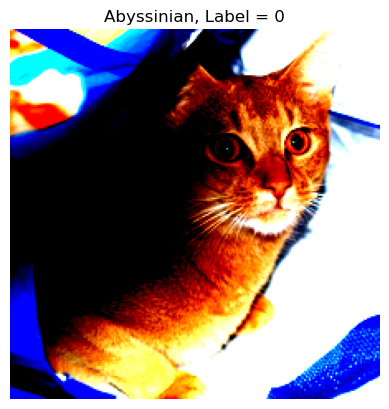

In [67]:
image, label = train_data[0]
print(f'Image shape: {image.shape}')
plt.imshow(image.permute(1, 2, 0))
plt.title(label=f'{class_names[label]}, Label = {label}')
plt.axis('off')
plt.show()

In [70]:

from typing import List

# Define the standard ImageNet mean and standard deviation
IMAGENET_MEAN = torch.tensor([0.485, 0.456, 0.406])
IMAGENET_STD = torch.tensor([0.229, 0.224, 0.225])

def plot_random_images(images, class_names: List[str], seed: int = 42):
    """Plots 9 random images from a dataset, correctly un-normalizing them."""
    if seed:
        torch.manual_seed(seed)
        
    fig, axes = plt.subplots(3, 3, figsize=(9, 9))
    axes = axes.flatten()
    for ax in axes:
        random_idx = torch.randint(0, len(images), size=[1]).item()
        img, label = images[random_idx]
        
        
        # Un-normalize the image tensor for display
        # Reshape std and mean to broadcast correctly across the image channels
        unnormalized_img = img * IMAGENET_STD.view(3, 1, 1) + IMAGENET_MEAN.view(3, 1, 1)
        
        # Plot the un-normalized image
        # Permute the dimensions from [C, H, W] to [H, W, C] for matplotlib
        ax.imshow(unnormalized_img.permute(1, 2, 0))
        ax.set_title(f'{class_names[label]}')
        ax.axis('off')
        
    plt.tight_layout()
    plt.show()


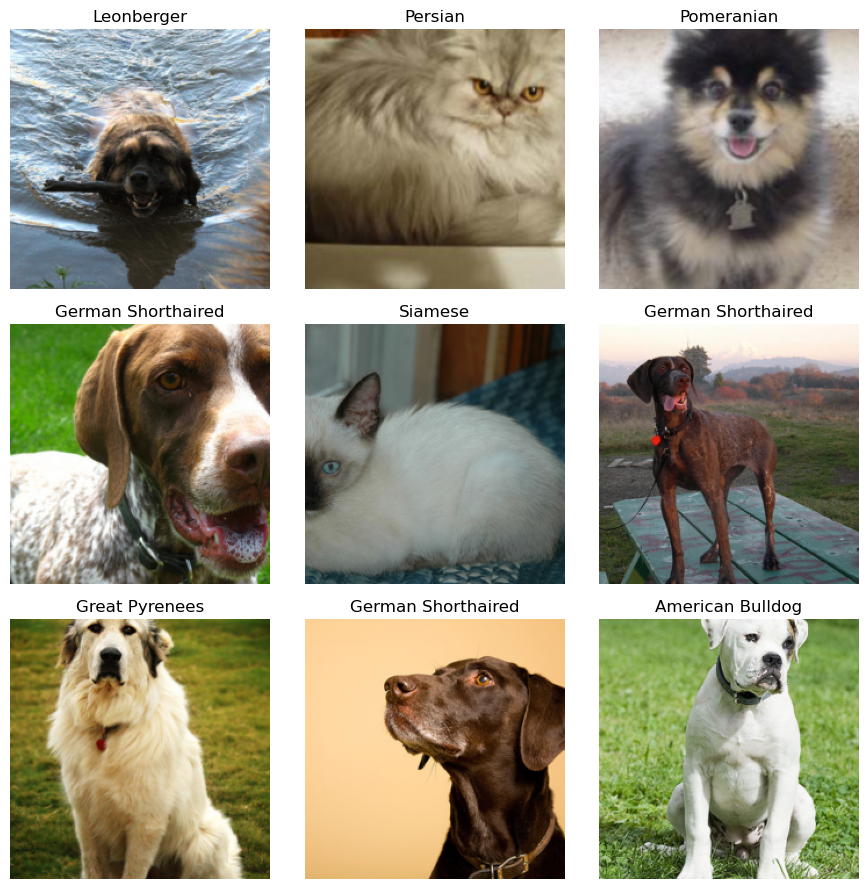

In [71]:
plot_random_images(train_data, class_names)

## 2. Prepare DataLoader

In [72]:
from torch.utils.data import DataLoader

# Setup the batch size 
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                             batch_size=BATCH_SIZE,
                             shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=BATCH_SIZE,
                            shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x12a7f80a6e0>,
 <torch.utils.data.dataloader.DataLoader at 0x12a7f7e2b30>)

In [73]:
# Let's check out what we've created
print(f'DataLoaders: {train_dataloader, test_dataloader}')
print(f'Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...')
print(f'Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}')

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x0000012A7F80A6E0>, <torch.utils.data.dataloader.DataLoader object at 0x0000012A7F7E2B30>)
Length of train_dataloader: 115 batches of 32...
Length of test_dataloader: 115 batches of 32


In [74]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 224, 224]), torch.Size([32]))

## 3. Model: Build a baseline model

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model

A baseline model is simple model you will try to improbe upon with subsequnet models/experiments.

In other words: start simple and add complexity when necessary.

In [92]:
class TinyVGG(nn.Module):
    def __init__(self,
                input_shape: int,
                hidden_units: int,
                output_shape: int):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                     out_channels=hidden_units,
                     padding=1,
                     stride=1,
                     kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     padding=1,
                     stride=1,
                     kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.conv_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                     out_channels=hidden_units,
                     padding=1,
                     stride=1,
                     kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                     out_channels=hidden_units,
                     padding=1,
                     stride=1,
                     kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*56*56, out_features=output_shape)
        )

    def forward(self, x):
        # x = self.conv_layer_1(x)
        # #print(x.shape)
        # x = self.conv_layer_2(x)
        # #print(x.shape)
        # x = self.classifier(x)
        # #print(x.shape)
        x = self.classifier(self.conv_layer_2(self.conv_layer_1(x)))
        return x

In [93]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model_0 = TinyVGG(input_shape=3, hidden_units=20, output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_layer_1): Sequential(
    (0): Conv2d(3, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=62720, out_features=37, bias=True)
  )
)

In [94]:
# Let's pass a random tensor to see the result
rand_tensor = torch.randn(1, 3, 224, 224).to(device)
model_0(rand_tensor)
# pred logit for each class .

tensor([[ 0.0241,  0.0084, -0.0041, -0.0614,  0.0707, -0.0525, -0.0120,  0.0249,
         -0.0114, -0.0412,  0.0395, -0.0229, -0.0315, -0.0584, -0.0356, -0.0105,
         -0.0722, -0.0281, -0.0648, -0.0205,  0.0422, -0.0090, -0.0082, -0.0135,
          0.0156, -0.0413,  0.0123,  0.0091, -0.0347, -0.0180,  0.0398, -0.0103,
          0.0172, -0.0029, -0.0510, -0.0203,  0.0197]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

### 3.1 Setup loss, optimizer

In [95]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.1)

### 3.2 Creating a training and testing loop

In [96]:
from tqdm.auto import tqdm

# set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)

start = timer()

epochs = 5

# creating training and testing loop
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n....')
    # training
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        model_0.train()
        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 50 == 0:
            print(f'Looked at {batch * len(X)}/{len(train_data)} samples')
    train_loss /= len(train_dataloader)

    # Testing
    test_loss = 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            X, y = X.to(device), y.to(device)
            test_pred = model_0(X)
            test_loss += loss_fn(test_pred, y)

        test_loss /= len(test_dataloader)

    print(f'\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}')

end = timer()
print(f'Total time: {end - start:.3f} seconds')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
....
Looked at 0/3680 samples
Looked at 1600/3680 samples
Looked at 3200/3680 samples

Train loss: 3110.73748 | Test loss: 3.63452
Epoch: 1
....
Looked at 0/3680 samples
Looked at 1600/3680 samples
Looked at 3200/3680 samples

Train loss: 3.64148 | Test loss: 3.62824
Epoch: 2
....
Looked at 0/3680 samples
Looked at 1600/3680 samples
Looked at 3200/3680 samples

Train loss: 3.63652 | Test loss: 3.63204
Epoch: 3
....
Looked at 0/3680 samples
Looked at 1600/3680 samples
Looked at 3200/3680 samples

Train loss: 3.63572 | Test loss: 3.63349
Epoch: 4
....
Looked at 0/3680 samples
Looked at 1600/3680 samples
Looked at 3200/3680 samples

Train loss: 3.64132 | Test loss: 3.63790
Total time: 239.353 seconds


**Loss is still quite high The model is Underfitting**

## 4. Transfer Learning

Let's Try efficientnet_b0()

### 4.1 Setup Model

In [97]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
model_1 = torchvision.models.efficientnet_b0(weights=weights).to(device)

In [98]:
summary(model_1, input_size=(1, 3, 224, 224))

Layer (type:depth-idx)                                  Output Shape              Param #
EfficientNet                                            [1, 1000]                 --
├─Sequential: 1-1                                       [1, 1280, 7, 7]           --
│    └─Conv2dNormActivation: 2-1                        [1, 32, 112, 112]         --
│    │    └─Conv2d: 3-1                                 [1, 32, 112, 112]         864
│    │    └─BatchNorm2d: 3-2                            [1, 32, 112, 112]         64
│    │    └─SiLU: 3-3                                   [1, 32, 112, 112]         --
│    └─Sequential: 2-2                                  [1, 16, 112, 112]         --
│    │    └─MBConv: 3-4                                 [1, 16, 112, 112]         1,448
│    └─Sequential: 2-3                                  [1, 24, 56, 56]           --
│    │    └─MBConv: 3-5                                 [1, 24, 56, 56]           6,004
│    │    └─MBConv: 3-6                              

In [99]:
# Let's freeze the backbone layers
for param in model_1.features.parameters():
    param.requires_grad = False

In [100]:
# Let' change the classifier head
model_1.classifier = nn.Sequential(
    nn.Dropout(0.2, inplace=True),
    nn.Linear(in_features=1280, out_features=len(class_names))
)

### 4.2 Setup Loss Function and Optimizer

In [101]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.001)

### 4.3 Writing Training and Testing Loop (functionize this)

In [115]:

def train_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn,
              device: torch.device = device):

    """Performs a training step with model trying to learn on data_loader"""
    train_loss, train_acc = 0, 0

    # Put model into training mode
    model.train() 
    
    # Add a loop to loop through the training batches
    for batch, (X, y) in enumerate(data_loader):

        # Put data on target device
        X, y = X.to(device), y.to(device)
        
        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch 
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss  and acc by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    return train_loss, train_acc
    

def test_step(model: torch.nn.Module,
             data_loader: torch.utils.data.DataLoader,
             loss_fn: torch.nn.Module,
             accuracy_fn,
             device: torch.device = device):
    """Performs a testing loop step on model going over data_loader"""

    test_loss, test_acc = 0, 0
    # Put the model in eval mode
    model.eval()

    # Turn on inference mode context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send the data to the target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate the loss/acc
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))

        # Adjust metrics and print out

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

    return test_loss, test_acc
            

In [116]:
torch.manual_seed(42)
from helper_functions import accuracy_fn

# Measure time 
from timeit import default_timer as timer
start = timer()

# Set epochs
epochs = 5
model_1.to(device)
# Create an optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
    print(f'Epoch: {epoch}\n--------')
    train_step(model=model_1, 
              data_loader=train_dataloader,
              loss_fn=loss_fn,
              optimizer=optimizer,
              accuracy_fn=accuracy_fn,
              device=device)
    test_step(model=model_1,
             data_loader=test_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             device=device)

# Calculate training time      
end = timer()
print(f'Total time: {end - start:.3f} seconds')

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
--------
Epoch: 1
--------
Epoch: 2
--------
Epoch: 3
--------
Epoch: 4
--------
Total time: 302.520 seconds


**Wow Loss is around 0.5 only that's great but it feels like now the model is overfitting**

## 5. Experiment Setup

In [117]:
from torch.utils.tensorboard import SummaryWriter
def create_writer(experiment_name: str,
                 model_name: str,
                 extra: str = None):
    """Creates a torch.utils.tensorboard.writer.SummaryWRiter() instance tracking to a specific directory"""
    from datetime import datetime
    import os 

    # Get timestamp of current date in reverse order
    timestamp = datetime.now().strftime('%Y-%m-%d')

    if extra:
        # Create log directory path
        log_dir = os.path.join('runs', timestamp, experiment_name, model_name, extra)
    else:
        log_dir = os.path.join('runs', timestamp, experiment_name, model_name)
    print(f'[INFO] Created SummaryWriter saving to {log_dir}')
    
    return SummaryWriter(log_dir=log_dir)

In [121]:
from typing import Dict, Tuple, List
def train(model: torch.nn.Module, 
          train_dataloader: torch.utils.data.DataLoader, 
          test_dataloader: torch.utils.data.DataLoader, 
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device,
         writer: torch.utils.tensorboard.writer.SummaryWriter) -> Dict[str, List[float]]:
    """Trains and tests a PyTorch model.

    Passes a target PyTorch models through train_step() and test_step()
    functions for a number of epochs, training and testing the model
    in the same epoch loop.

    Calculates, prints and stores evaluation metrics throughout.

    Args:
    model: A PyTorch model to be trained and tested.
    train_dataloader: A DataLoader instance for the model to be trained on.
    test_dataloader: A DataLoader instance for the model to be tested on.
    optimizer: A PyTorch optimizer to help minimize the loss function.
    loss_fn: A PyTorch loss function to calculate loss on both datasets.
    epochs: An integer indicating how many epochs to train for.
    device: A target device to compute on (e.g. "cuda" or "cpu").

    Returns:
    A dictionary of training and testing loss as well as training and
    testing accuracy metrics. Each metric has a value in a list for 
    each epoch.
    In the form: {train_loss: [...],
              train_acc: [...],
              test_loss: [...],
              test_acc: [...]} 
    For example if training for epochs=2: 
             {train_loss: [2.0616, 1.0537],
              train_acc: [0.3945, 0.3945],
              test_loss: [1.2641, 1.5706],
              test_acc: [0.3400, 0.2973]} 
    """
    # Create empty results dictionary
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
    }

    # Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                          data_loader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer,
                                          device=device,
                                          accuracy_fn=accuracy_fn)
        test_loss, test_acc = test_step(model=model,
          data_loader=test_dataloader,
          loss_fn=loss_fn,
          device=device,
        accuracy_fn=accuracy_fn
                                        
                                       )

        # Print out what's happening
        print(
          f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
        )

        # Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

        ## New: Experiment Tracking ### 
        if writer:
            writer.add_scalars(main_tag='Loss',
                             tag_scalar_dict={'train_loss': train_loss,
                                             'test_loss': test_loss},
                             global_step=epoch)
    
            writer.add_scalars(main_tag='Accuracy',
                             tag_scalar_dict={'train_acc': train_acc,
                                             'test_acc': test_acc},
                             global_step=epoch)
    
            writer.add_graph(model=model,
                            input_to_model=torch.randn(32, 3, 224, 224).to(device))

            # Close the write
            writer.close()
        else:
            pass
    ### End New ###

    # Return the filled results at the end of the epochs
    return results


In [122]:
import torchvision
from torch import nn

OUT_FEATURES = len(class_names)

# Create an EffNetB0 feature extractor
def create_effnetb0():
    # Get the weights and setup a model
    weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT
    model = torchvision.models.efficientnet_b0(weights=weights)

    # Freeze the base model layers
    for param in model.features.parameters():
        param.requires_grad = False 

    # Change the classfier head 
    from going_modular.utils import set_seeds
    set_seeds()
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.2, inplace=True),
        nn.Linear(in_features=1280, out_features=OUT_FEATURES)
    ).to(device)

    # Give the model a name
    model.name = 'effnetb0'
    print(f'[INFO] Created new {model.name} model...')
    return model


# Create an EffNetB2 feature extractor
def create_effnetb2():
    # Get the weights and setup a model
    weights = torchvision.models.EfficientNet_B2_Weights.DEFAULT
    model = torchvision.models.efficientnet_b2(weights=weights)

    # Freeze the base model layers
    for param in model.features.parameters():
        param.requires_grad = False 

    # Change the classfier head 
    from going_modular.utils import set_seeds
    set_seeds()
    model.classifier = nn.Sequential(
        nn.Dropout(p=0.3, inplace=True),
        nn.Linear(in_features=1408, out_features=OUT_FEATURES)
    ).to(device)

    # Give the model a name
    model.name = 'effnetb2'
    print(f'[INFO] Created new {model.name} model...')
    return model



In [ ]:
%%time
from going_modular.utils import save_model, set_seeds
from timeit import default_timer as timer

# Set seed
set_seeds(seed=42)

# Track experiment count
experiment_number = 0

# Create epoch list 
num_epochs = [5, 10]

# Create models list
models = ['effnetb0', 'effnetb2']

# Learning rates to experiment with
lrs = [0.01, 0.001, 0.0001]

# Loop through each learning rate
for learning_rate in lrs:
    # Loop through each number of epochs
    for epochs in num_epochs:
        # Loop through each model
        for model_name in models:
            experiment_number += 1
            print(f'[INFO] Experiment number: {experiment_number}')
            print(f'[INFO] Model: {model_name}')
            print(f'[INFO] Epochs: {epochs}')
            print(f'[INFO] Learning Rate: {learning_rate}')

            # Create model
            if model_name == 'effnetb0':
                model = create_effnetb0().to(device)
            else:
                model = create_effnetb2().to(device)

            # Set loss and optimizer
            loss_fn = nn.CrossEntropyLoss()
            optimizer = torch.optim.Adam(params=model.parameters(),
                                         lr=learning_rate)

            # Train model
            train(model=model,
                  train_dataloader=train_dataloader,
                  test_dataloader=test_dataloader,
                  loss_fn=loss_fn,
                  optimizer=optimizer,
                  device=device,
                  epochs=epochs,
                  writer=create_writer(experiment_name="flowers102",
                                       model_name=model_name,
                                       extra=f"{epochs}_epochs_lr_{learning_rate}"))

            # Save model
            save_filepath = f'flowers102_{model_name}_{epochs}_epochs_lr_{learning_rate}.pth'
            save_model(model=model,
                       target_dir='models',
                       model_name=save_filepath)

            print('-'*60 + '\n')


[INFO] Experiment number: 1
[INFO] Model: effnetb0
[INFO] Epochs: 5
[INFO] Learning Rate: 0.01
[INFO] Created new effnetb0 model...
[INFO] Created SummaryWriter saving to runs\2025-07-21\flowers102\effnetb0\5_epochs_lr_0.01


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0610 | train_acc: 70.1087 | test_loss: 0.6263 | test_acc: 81.5748
Epoch: 2 | train_loss: 0.3715 | train_acc: 88.3152 | test_loss: 0.5949 | test_acc: 82.6760
Epoch: 3 | train_loss: 0.2833 | train_acc: 90.4620 | test_loss: 0.7147 | test_acc: 81.3859
Epoch: 4 | train_loss: 0.2721 | train_acc: 91.1957 | test_loss: 0.8312 | test_acc: 80.4348
Epoch: 5 | train_loss: 0.2159 | train_acc: 92.7446 | test_loss: 0.7685 | test_acc: 81.3859
[INFO] Saving model to: models\flowers102_effnetb0_5_epochs_lr_0.01.pth
------------------------------------------------------------

[INFO] Experiment number: 2
[INFO] Model: effnetb2
[INFO] Epochs: 5
[INFO] Learning Rate: 0.01
[INFO] Created new effnetb2 model...
[INFO] Created SummaryWriter saving to runs\2025-07-21\flowers102\effnetb2\5_epochs_lr_0.01


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9933 | train_acc: 71.4130 | test_loss: 0.5619 | test_acc: 83.6957
Epoch: 2 | train_loss: 0.4206 | train_acc: 86.7663 | test_loss: 0.6021 | test_acc: 83.5054
Epoch: 3 | train_loss: 0.3652 | train_acc: 88.9402 | test_loss: 0.6316 | test_acc: 83.8315
Epoch: 4 | train_loss: 0.3003 | train_acc: 90.8967 | test_loss: 0.6261 | test_acc: 84.4565
Epoch: 5 | train_loss: 0.2990 | train_acc: 90.8696 | test_loss: 0.6770 | test_acc: 83.5999
[INFO] Saving model to: models\flowers102_effnetb2_5_epochs_lr_0.01.pth
------------------------------------------------------------

[INFO] Experiment number: 3
[INFO] Model: effnetb0
[INFO] Epochs: 10
[INFO] Learning Rate: 0.01
[INFO] Created new effnetb0 model...
[INFO] Created SummaryWriter saving to runs\2025-07-21\flowers102\effnetb0\10_epochs_lr_0.01


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0610 | train_acc: 70.1087 | test_loss: 0.6263 | test_acc: 81.5748
Epoch: 2 | train_loss: 0.3715 | train_acc: 88.3152 | test_loss: 0.5949 | test_acc: 82.6760
